In [1]:
import os

import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

import appletree as apt
from appletree.likelihood import Likelihood
from appletree.parameter import Parameter
from appletree.share import DATAPATH, PARPATH
from appletree.components import *

In [2]:
apt.set_gpu_memory_usage(0.2)

In [3]:
config = dict(
    data_file_name = os.path.join(DATAPATH, 'data_XENONnT_Rn220_v8_strax_v1.2.2_straxen_v1.7.1_cutax_v1.9.0.csv'),
    bins_type = 'equiprob',
    bins_on = ['cs1', 'cs2'],
    bins = [15, 15],
    x_clip = [0, 100],
    y_clip = [2e2, 1e4],
)

llh = Likelihood(**config)

In [4]:
llh.register_component(AC, 'rn220_ac')
llh.register_component(ERBand, 'rn220_er')
llh.print_likelihood_summary(short=True)


BINNING

    bins_type: equiprob
    bins_on: ['cs1', 'cs2']

DATA

    file_name: /home/xudc/appletree/appletree/data/data_XENONnT_Rn220_v8_strax_v1.2.2_straxen_v1.7.1_cutax_v1.9.0.csv
    data_rate: 2058.0

MODEL

    COMPONENT 0: rn220_ac
        type: fixed
        rate_par: ac_rate
        pars: ['ac_rate']

    COMPONENT 1: rn220_er
        type: simulation
        rate_par: er_rate
        pars: ['drift_velocity', 'er_rate', 'fano', 'field', 'g1', 'g2', 'gas_gain', 'nex_ni_ratio', 'p_dpe', 'py0', 'py1', 'py2', 'py3', 'py4', 'rf0', 'rf1', 's2_threshold', 'w']



In [5]:
par_manager = Parameter(os.path.join(PARPATH, 'apt_sr0_er.json'))
par_manager.sample_init()

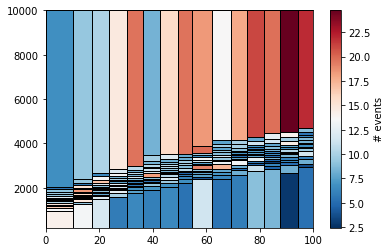

(DeviceArray([1138210345, 1458656938], dtype=uint32), 2329.818359375)

In [6]:
key = apt.get_key()
par_manager.sample_init()

key, hist = llh.simulate_model_hist(key, int(1e6), par_manager.get_all_parameter())
apt.plot_irreg_histogram_2d(*llh.bins, hist)
plt.show()

llh.get_log_likelihood(key, int(1e6), par_manager.get_all_parameter())